In [14]:
import torch
import torch.nn as nn

# Working through this series - https://medium.com/dataseries/variational-autoencoder-with-pytorch-2d359cbf027b


In [3]:
x = torch.rand(5, 3)
print(x)

torch_a1 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
torch_a2 = torch.tensor([[2,3],[2,3],[2,3]])
print(torch.mm(torch_a1,torch_a2))

print(torch_a1 * 2)

tensor([[0.0488, 0.4432, 0.0481],
        [0.9073, 0.0685, 0.4664],
        [0.4775, 0.8788, 0.0390],
        [0.0432, 0.4476, 0.7849],
        [0.1220, 0.0960, 0.1048]])
tensor([[12, 18],
        [30, 45],
        [48, 72]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])


In [4]:
# Define operations
x1 = torch.tensor([2.0], requires_grad=True).float()
z1 = x1
x2 = torch.tensor([2.0], requires_grad=True).float()
z2 = x2**2
x3 = torch.tensor([2.0], requires_grad=True).float()
z3 = x3**3

# Backward
z1.backward()
z2.backward()
z3.backward()

# Print gradients
print('dz1/dx1 evaluated in %f: %f' % (x1, x1.grad)) # dz1/dx = 2
print('dz2/dx2 evaluated in %f: %f' % (x2, x2.grad)) # dz2/dx = 2 * 2
print('dz3/dx3 evaluated in %f: %f' % (x3, x3.grad)) # dz3/dx = 3 * 4

dz1/dx1 evaluated in 2.000000: 1.000000
dz2/dx2 evaluated in 2.000000: 4.000000
dz3/dx3 evaluated in 2.000000: 12.000000


In [12]:
def sigmoid(x): 
    return 1/(1+torch.exp(-x))

torch.manual_seed(7)

inputs = torch.randn((1, 10))
w1 = torch.randn_like(inputs).view(10, 1)
b1 = torch.randn((1, 1))

output = sigmoid(torch.mm(inputs, w1) + b1)
output

tensor([[0.3030]])

In [13]:
input_layer = torch.rand(10)
print(input_layer.shape)

#h1 contains 20 units
w1 = torch.rand(10,20)
b1 = torch.randn(20)
#h2 contains 20 units
w2 = torch.rand(20,20)
b2 = torch.randn(20)
#the output layer has 10 units
w3 = torch.rand(20,10)
b3 = torch.randn(10)

h1 = torch.matmul(w1.T,input_layer)+b1
print("First hidden layer:")
print(h1,"\n")
h2 = torch.matmul(w2.T,h1)+b2
print("Second hidden layer:")
print(h2,"\n") 
output_layer = torch.matmul(w3.T,h2)+b3
print("Output layer:")
print(output_layer)

torch.Size([10])
First hidden layer:
tensor([2.8571, 4.5964, 2.7061, 1.6105, 4.0433, 1.6860, 3.6443, 2.1050, 3.9807,
        3.4162, 2.5031, 1.6862, 2.9572, 2.2082, 3.2833, 3.7847, 2.7327, 2.6177,
        1.2653, 5.9995]) 

Second hidden layer:
tensor([32.2993, 23.9020, 20.6125, 30.9846, 30.5237, 41.0882, 27.3729, 29.6121,
        28.8898, 33.0395, 31.6494, 33.4028, 31.4145, 28.3931, 29.2206, 26.7620,
        29.9971, 33.3539, 24.0110, 28.0911]) 

Output layer:
tensor([267.5025, 292.9840, 243.6890, 277.8268, 314.4776, 387.0657, 258.0089,
        334.9822, 283.3747, 273.0109])


In [19]:
# Neural Net Class

class Net(nn.Module): 

    def __init__(self): 
        super(Net, self).__init__()

        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 20)
        self.out = nn.Linear(20, 10)

    def forward(self, x): 
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x

inputs = torch.randn(10)
net = Net()
result = net(inputs)
print(result)


tensor([ 0.0022, -0.1521, -0.1852,  0.4676,  0.1542,  0.1317, -0.3153, -0.1101,
         0.3826,  0.1177], grad_fn=<AddBackward0>)


# Pytorch datasets

In [48]:
import torch
from torch.utils.data import Dataset, DataLoader, Subset, ConcatDataset, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
dataset_path = 'datasets'
batch_size=256
train_dataset = datasets.FashionMNIST(dataset_path, transform=ToTensor(), train=True, download=True)
test_dataset  = datasets.FashionMNIST(dataset_path, transform=ToTensor(), train=False, download=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 12298409.34it/s]


Extracting datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to datasets/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 1121472.67it/s]

Extracting datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to datasets/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 9342967.35it/s] 


Extracting datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to datasets/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 28448322.78it/s]

Extracting datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to datasets/FashionMNIST/raw



In [24]:
print(len(train_dataset), len(test_dataset))

60000 10000


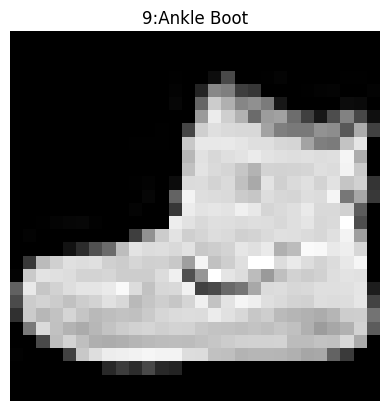

In [25]:
labels_map = {0: "T-Shirt",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",
              6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle Boot"}

img, label = train_dataset[0]
plt.title('{}:{}'.format(label,labels_map[label]))
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [26]:
train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)

In [27]:
train_features, train_labels = next(iter(train_loader))

In [34]:
# Test subsetting function from pytorch dataset

idx = np.where(train_dataset.targets == 0)[0]
train_subset = Subset(train_dataset, idx)
train_loader_subset = DataLoader(train_subset, shuffle=True, batch_size=256)

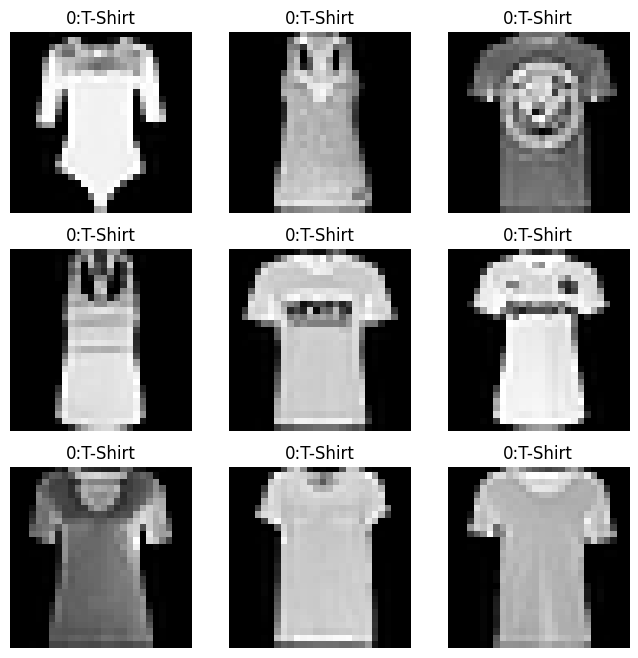

In [35]:

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  
    sample_idx = torch.randint(len(train_subset), size=(1,)).item()
    img, label = train_subset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title('{}:{}'.format(label,labels_map[label]))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
plt.show()

In [39]:
dataset = ConcatDataset([train_dataset,test_dataset])
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
len(dataset) #70000
len(data_loader) #274 batches

274

In [47]:
# Converting pandas datasets to pytorch -> usually create your own dataset class for more complex features 

from sklearn.datasets import fetch_california_housing
import pandas as pd

housing  = fetch_california_housing()
df = pd.DataFrame(data=housing.data,columns=housing.feature_names)
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
from torch.utils.data import TensorDataset

target = torch.tensor(df['target'].values)
features = torch.tensor(df.drop('target', axis = 1).values)
train = TensorDataset(features, target)
train_loader = DataLoader(train, batch_size=2, shuffle=True)

10320

In [54]:
class Housing_Dataset(Dataset):
    
    def __init__(self,df):
        self.df = df
        self.data = torch.from_numpy(self.df.drop(['target'],axis=1).values)
        self.targets = torch.from_numpy(self.df['target'].values)
    
    def __getitem__(self,idx):
        return self.data[idx],self.targets[idx].item()
        
    def __len__(self):
        return len(self.targets)

In [55]:
b_data = Housing_Dataset(df=df)
b_loader = DataLoader(dataset=b_data,batch_size=4,shuffle=True)
for x,y in b_loader:
    print(y)

tensor([1.3850, 1.4820, 5.0000, 1.6170], dtype=torch.float64)
tensor([3.7500, 2.1300, 4.4660, 2.6880], dtype=torch.float64)
tensor([2.9480, 1.1820, 1.7000, 4.3480], dtype=torch.float64)
tensor([2.8170, 1.3330, 2.5820, 4.5280], dtype=torch.float64)
tensor([2.3170, 1.4760, 2.3160, 1.7350], dtype=torch.float64)
tensor([3.0160, 5.0000, 2.9410, 5.0000], dtype=torch.float64)
tensor([0.5550, 1.1090, 2.6970, 2.2970], dtype=torch.float64)
tensor([1.9000, 2.7240, 1.5970, 2.6520], dtype=torch.float64)
tensor([0.6050, 1.8930, 1.7380, 2.1150], dtype=torch.float64)
tensor([0.7130, 0.9650, 5.0000, 1.0330], dtype=torch.float64)
tensor([1.7920, 3.3330, 1.5190, 1.6760], dtype=torch.float64)
tensor([3.2800, 2.4310, 1.9520, 2.6330], dtype=torch.float64)
tensor([1.6460, 1.2310, 1.5470, 3.7400], dtype=torch.float64)
tensor([1.2180, 3.2670, 0.3980, 2.2110], dtype=torch.float64)
tensor([2.5200, 1.7840, 1.2470, 1.1560], dtype=torch.float64)
tensor([5.0000, 1.5390, 1.4180, 4.3330], dtype=torch.float64)
tensor([

In [56]:
# Random sampling 

# Randomly sample indexes from total data for training 
random_train_idx = np.random.choice(np.array(range(len(train_dataset))),replace=False, size=25600)

# Subset from total data 
train_subset = Subset(train_dataset, random_train_idx)
train_loader_subset = DataLoader(train_subset, shuffle=True, batch_size=batch_size)
len(train_loader_subset) #100

100